# BIOTI670-Neural Network for Drug Efficiency Against Tumors Using Gene Expression data
We will use data from http://cancerrgene.org
The drug with the lowest IC50 index is the drug that has the highest efficiency.The concentration of a drug or inhibitor needed to inhibit a biological process or response by 50%.IC50 is commonly used as a measure of drug potency in whole cell assays. IC50 assays are also used for screening in target-based drug discovery campaigns. I have included the gene expression cancer RNA-Seq Data Set from the https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq# This collection of data is part of the RNA-Seq (HiSeq) PANCAN data set, it is a random extraction of gene expressions of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD. The way this new code functions is selecting a cancer drug IC50 data (dfa) and comparing it to a cancer gene (dfb) to predict drug accuracy. 



## Libraries Needed
 - numpy
 - matplotlib
 - pandas
 - tensorflow
 - keras
 - scikit-learn

## Import Python libraries

In [246]:
# data handling
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

# feature selection
from sklearn.feature_selection import mutual_info_classif

# classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# neural building Libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC


## Read data

In [247]:
#Read in data from csv files
dfa = pd.read_csv("/Users/Albert3/Downloads/Cetuximab.csv")
dfb = pd.read_csv("/Users/Albert3/Downloads/cancer_gene_expression.csv")




In [248]:
Cetuximab = pd.concat([dfa, dfb], ignore_index=True, sort =False)


In [249]:
# let's check the number of samples and features
# note:the last column contain the labels. it is not considered as a feature

print(dfb.shape)
print(dfa.shape)

(801, 8001)
(862, 12)


In [250]:
print(dfb['Cancer_Type'].value_counts())

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Cancer_Type, dtype: int64


In [252]:
#let's check some of the columns 
print(dfb.columns[0:14])
print(dfa.columns [0:15])

Index(['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6', 'gene_7',
       'gene_8', 'gene_9', 'gene_10', 'gene_11', 'gene_12', 'gene_13',
       'gene_14'],
      dtype='object')
Index(['Drug Name', 'Drug ID', 'Cell Line Name', 'Cosmic ID',
       'TCGA Classification', 'Tissue', 'Tissue Sub-type', 'IC50', 'AUC',
       'Max Conc', 'RMSE', 'Z score'],
      dtype='object')


In [253]:
#lets check the name of the columns of this dataframe
dfb.columns[0:5]
dfa.columns[0:1]


Index(['Drug Name'], dtype='object')

In [254]:
#check for missing values
datanul=dfb.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


## Data Exploration & Cleaning
Data cleaning is very important in machine learning as it makes our data to be of a high quality for better results.
- Here we will check for Null values and remove them for greater accuracy\
- In the exploration stage we will see the structure of our data, the columns, rows and their numbers




In [255]:
# How to check the rows of your data. By placing a number within the () you can control how much you can see.
dfa.head(3)
dfb.head(5)

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.0,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.0,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.0,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.0,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.0,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD


# New Section

In [256]:
# Checking for any null values in our dataset
dfb.isnull().sum()


gene_1         0
gene_2         0
gene_3         0
gene_4         0
gene_5         0
              ..
gene_7997      0
gene_7998      0
gene_7999      0
gene_8000      0
Cancer_Type    0
Length: 8001, dtype: int64

## Dropping the null values

In [257]:
# Dropping The rows that have the null values so our data may be accurate as possible
dfa = dfa.dropna(axis=0, how = "any", thresh=None, inplace=False)
dfb


,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.000000,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.000000,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.000000,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.000000,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.000000,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,2.933384,0.0,1.683921,0.0,0.0,0.0,0.0,0.635336,1.252839,...,9.985842,9.469967,4.225275,6.955336,11.722206,7.309940,10.986119,6.396848,1.252839,BRCA
797,0.0,0.000000,0.0,2.772625,0.0,0.0,0.0,0.0,0.534759,3.761764,...,12.334681,8.157327,1.482797,6.758183,11.403838,9.005347,11.012045,5.386625,1.697640,COAD
798,0.0,0.408277,0.0,1.854754,0.0,0.0,0.0,0.0,0.000000,0.986520,...,11.671992,8.859616,6.393828,6.427115,11.596586,7.454127,10.718533,5.507417,1.398131,BRCA
799,0.0,0.639232,0.0,3.226971,0.0,0.0,0.0,0.0,1.921322,0.639232,...,12.237087,5.753976,4.192478,6.614875,11.183245,7.544261,10.649382,5.282158,0.639232,BRCA


In [258]:
# Checking if the Null Values have been dropped
dfa.isnull().any()

Drug Name              False
Drug ID                False
Cell Line Name         False
Cosmic ID              False
TCGA Classification    False
Tissue                 False
Tissue Sub-type        False
IC50                   False
AUC                    False
Max Conc               False
RMSE                   False
Z score                False
dtype: bool

As it can be seen our data is now cleaned and does not contain any rows that have null values

## Checking for the drugs that our data set contains

In [273]:
dfa["IC50"].value_counts()
dfb["gene_1000"].value_counts()

0.000000     742
0.387032       1
2.828530       1
1.039349       1
1.734395       1
1.463989       1
9.303011       1
0.457647       1
1.318114       1
6.639255       1
0.785592       1
0.562181       1
0.792772       1
10.017198      1
3.176817       1
1.063986       1
0.427070       1
0.374622       1
0.363451       1
0.580628       1
0.349252       1
1.531619       1
1.731835       1
3.115666       1
7.880447       1
1.954829       1
0.472072       1
0.416083       1
11.764071      1
2.647338       1
0.617581       1
1.239520       1
0.614663       1
0.638584       1
2.355411       1
2.255410       1
1.078542       1
0.566572       1
1.795684       1
1.492981       1
5.271568       1
0.345851       1
2.947124       1
3.104588       1
1.440686       1
0.695905       1
7.538926       1
7.903569       1
8.519687       1
0.356482       1
1.321582       1
9.011437       1
2.797698       1
5.702536       1
0.357608       1
4.814714       1
8.360593       1
1.509747       1
9.665164      

We can see that there are 288 drugs we can also see the number of samples of the drug.

 
## **Data preprocesing** 
This is done to put the data in an appropriate format before modelling


In [274]:
# in our data we will used= the following columns to develop our model that will be assigned to x and y variables
X=dfb[["gene_1000" ]].values
y= dfa[["IC50"]].values

\
**Encode labels**

The labels for this data are categorical and we therefore have to convert them to numeric forms. This is referred to as encoding. Machine learning models usually require input data to be in numeric forms.

In [275]:
#let's encode target labels (y) with values between 0 and n_classes-1.
# we will be using LabelEncoder to perform the encoding
label_encoder=LabelEncoder()
label_encoder.fit(X)
y=label_encoder.transform(X)
labels=label_encoder.classes_
classes=np.unique(X)
nclasses=np.unique(X).shape[0]

/Users/Albert3/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Albert3/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


\
**Data Splitting**\
Data is split into three: training, validation and test sets\
-validation set is used for evaluating the model during training.\
-training set is used for training\
-test set is used to test the model after training and tuning has been completed.

In [276]:
# let's encode target labels (y) with values between 0 and n_classes-1.
# we will be using LabelEncoder to perform the encoding

label_encoder=LabelEncoder()
label_encoder.fit(X)
y=label_encoder.transform(X)
labels=label_encoder.classes_
classes=np.unique(X)
nclasses=np.unique(X).shape[0]
nclasses

60

In [278]:
#split data into training,validation and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.08,random_state=1)

#split the training set into two (training and validation)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.08)

In [279]:
# check the shape of X_train and y_train
X_train.shape, y_train.shape

((677, 1), (677,))

\
**Data Normalization**\
Data normalization is done so the values are in the same range to improve model performance and avoid bias.


In [281]:
#split data into training,validation and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.02)

#split the training set into two (training and validation)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.02)





# **Building Neural Network**

In [282]:

#define model
model = keras.Sequential()

#hidden layer 1
model.add(Dense(40, input_dim=X_train.shape[1], activation='relu'))

#hidden layer 2
model.add(Dense(20, activation='relu'))

#output layer
model.add(Dense(nclasses, activation='softmax'))

#define optimizer and learning rate. We will use Adam optimizer
opt_adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=opt_adam, metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [283]:
# fit the model to the training data
# the higher the epoch value the higher the accuracy but the longer it takes to execute. 
# An epoch means training the neural network with all the training data for one cycle. 
# In an epoch, we use all of the data exactly once. A forward pass and a backward pass together are counted as one pass: 
# An epoch is made up of one or more batches, where we use a part of the dataset to train the neural network.

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32,epochs=64, verbose=1)



Epoch 1/64
24/24 [==============================] - 0s 6ms/step - loss: 4.0627 - sparse_categorical_accuracy: 0.8906 - val_loss: 4.0550 - val_sparse_categorical_accuracy: 0.9375
Epoch 2/64
24/24 [==============================] - 0s 2ms/step - loss: 3.9582 - sparse_categorical_accuracy: 0.9284 - val_loss: 3.9195 - val_sparse_categorical_accuracy: 0.9375
Epoch 3/64
24/24 [==============================] - 0s 2ms/step - loss: 3.7818 - sparse_categorical_accuracy: 0.9271 - val_loss: 3.7019 - val_sparse_categorical_accuracy: 0.9375
Epoch 4/64
24/24 [==============================] - 0s 2ms/step - loss: 3.4868 - sparse_categorical_accuracy: 0.9271 - val_loss: 3.3459 - val_sparse_categorical_accuracy: 0.9375
Epoch 5/64
24/24 [==============================] - 0s 2ms/step - loss: 3.0219 - sparse_categorical_accuracy: 0.9271 - val_loss: 2.8001 - val_sparse_categorical_accuracy: 0.9375
Epoch 6/64
24/24 [==============================] - 0s 2ms/step - loss: 2.3616 - sparse_categorical_accuracy: 

In [284]:
predictions = model.predict(X_test)
_, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [285]:
accuracy

0.8823529481887817

In [238]:
predictions[0]

array([9.98552859e-01, 9.78234675e-05, 8.56392799e-05, 9.45553184e-05,
       8.29091878e-05, 6.53161042e-05, 4.96906760e-05, 6.68610155e-05,
       5.09339588e-05, 4.42788696e-05, 4.32359520e-05, 5.44972972e-05,
       3.56069067e-05, 3.70806592e-05, 2.84849539e-05, 2.50912017e-05,
       2.75612365e-05, 2.39933252e-05, 2.32871516e-05, 2.89125637e-05,
       2.38678731e-05, 1.86173947e-05, 2.55114992e-05, 2.12576979e-05,
       2.26480897e-05, 2.72307370e-05, 1.58372786e-05, 1.43591587e-05,
       1.74493580e-05, 1.65899983e-05, 1.73452809e-05, 1.04384635e-05,
       1.36026820e-05, 1.45543245e-05, 1.38832393e-05, 1.18917587e-05,
       4.67366181e-06, 1.26168898e-05, 1.02200411e-05, 1.19335209e-05,
       7.32826311e-06, 9.24119558e-06, 1.47681067e-05, 8.40812390e-06,
       2.14861666e-06, 9.09228584e-06, 8.56834413e-06, 4.48287847e-06,
       5.20683534e-06, 4.32429033e-06, 1.11262989e-05, 2.93766789e-06,
       5.13246960e-06, 5.11408416e-06, 5.22783739e-06, 2.40209465e-06,
      

In [286]:
np.argmax(predictions)

0

In [287]:
# Get the predictions for samples in the test set. You can change by alter the number within the []
for index,entry in enumerate(predictions[0:10,:]):
    print('predicted:%d ,actual:%d'%(np.argmax(entry),y_test[index]))

predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:10
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:55 ,actual:40
predicted:0 ,actual:0


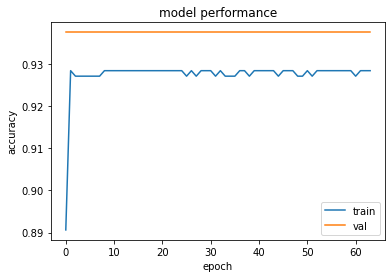

In [288]:
# Summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()


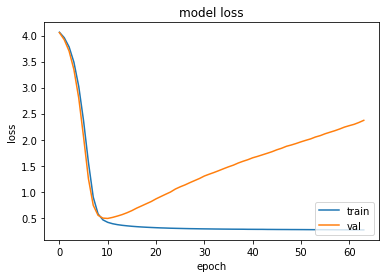

In [289]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

